In [575]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

df = pd.read_csv('delhivery_data.csv')
print("Dataframe rows and column count: ", df.shape)
df.head()

Dataframe rows and column count:  (144867, 24)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [576]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [577]:
# Checking for entries with Source name and destination name not available
df[df["source_name"].isna() & df["destination_name"].isna()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
68006,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,...,2018-09-27 05:01:28,25.178605,26.0,23.0,25.7246,1.130435,26.0,23.0,25.7246,1.130435
68007,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,...,2018-09-27 03:33:17,45.101167,114.0,44.0,54.6110,2.590909,88.0,21.0,28.8863,4.190476
68008,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,...,2018-09-27 03:19:19.935198,50.844665,128.0,49.0,60.9205,2.612245,13.0,4.0,6.3096,3.250000


Since we just have 551 entries without the name information out of 144867 entries, we can drop them as those entries are less than 0.4% of the overall data. Hence, they'll be statistically insignificant for the analysis.

In [578]:
# Dropping all null values
df.dropna(axis=0, inplace=True)

In [579]:
# Fetching the Source and Destination State information from the Name columns
df["source_state"] = df["source_name"].apply(
    lambda x: x[x.find('(')+1: x.find(')')])
df["source_city"] = df.source_name.apply(lambda x: x.split('_')[0])
df["destination_state"] = df["destination_name"].apply(
    lambda x: x[x.find('(')+1: x.find(')')])
df["destination_city"] = df.destination_name.apply(lambda x: x.split('_')[0])

Since each trip UUID is associated with several source to destination combination, we create a separate column calling it as a segment key

In [580]:
# Creating a unique identifier for different segments of a trip
df["segment_key"] = df[["trip_uuid", "source_center", "destination_center"]].sum(axis=1)

We'll now compute the overall osrm distance, osrm time and actual time taken for For each segment

In [581]:
# Creating a new dataframe for capturing the overall segment_actual_time, segment_osrm_distance, segment_osrm_time for each segment
cumulative_segment_df = df[["segment_key", "segment_actual_time", "segment_osrm_distance",
    "segment_osrm_time"]].groupby(["segment_key"]).sum()
cumulative_segment_df.rename(columns={"segment_actual_time": "segment_actual_time_sum", "segment_osrm_distance": "segment_osrm_distance_sum", "segment_osrm_time":"segment_osrm_time_sum"}, inplace=True)
cumulative_segment_df.head()

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
segment_key,,,
trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0
trip-153671041653548748IND462022AAAIND209304AAA,820.0,649.8528,474.0
trip-153671042288605164IND561203AABIND562101AAA,46.0,28.1995,26.0
trip-153671042288605164IND572101AAAIND561203AAB,95.0,55.9899,39.0
trip-153671043369099517IND000000ACBIND160002AAC,608.0,317.7408,231.0


In [582]:
# Dropping the uuid columns, cutoff and factor columns along with source and destination names for reducing the dimensions
df.drop(["data", "is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "source_center", "destination_center",
        "route_schedule_uuid", "trip_uuid", "source_name", "destination_name", "segment_factor"], axis=1, inplace=True)

In [583]:
df = df.merge(cumulative_segment_df, on="segment_key", how="left")
df.head(10)

,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,2018-09-20 02:35:36.476840,Carting,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Gujarat,Anand,Gujarat,Khambhat,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
1,2018-09-20 02:35:36.476840,Carting,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Gujarat,Anand,Gujarat,Khambhat,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
2,2018-09-20 02:35:36.476840,Carting,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Gujarat,Anand,Gujarat,Khambhat,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
3,2018-09-20 02:35:36.476840,Carting,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Gujarat,Anand,Gujarat,Khambhat,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
4,2018-09-20 02:35:36.476840,Carting,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Gujarat,Anand,Gujarat,Khambhat,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
5,2018-09-20 02:35:36.476840,Carting,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,Gujarat,Khambhat,Gujarat,Anand,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0
6,2018-09-20 02:35:36.476840,Carting,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,Gujarat,Khambhat,Gujarat,Anand,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0
7,2018-09-20 02:35:36.476840,Carting,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,Gujarat,Khambhat,Gujarat,Anand,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0
8,2018-09-20 02:35:36.476840,Carting,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,Gujarat,Khambhat,Gujarat,Anand,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0
9,2018-09-20 02:35:36.476840,Carting,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,Gujarat,Khambhat,Gujarat,Anand,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0


In [584]:
# Checking the datatypes for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144316 non-null  object 
 1   route_type                      144316 non-null  object 
 2   od_start_time                   144316 non-null  object 
 3   od_end_time                     144316 non-null  object 
 4   start_scan_to_end_scan          144316 non-null  float64
 5   actual_distance_to_destination  144316 non-null  float64
 6   actual_time                     144316 non-null  float64
 7   osrm_time                       144316 non-null  float64
 8   osrm_distance                   144316 non-null  float64
 9   segment_actual_time             144316 non-null  float64
 10  segment_osrm_time               144316 non-null  float64
 11  segment_osrm_distance           144316 non-null  float64
 12  source_state    

In [585]:
# Fetching all columns containing time information
time_columns = [x for x in df.columns if "time" in x]
df[time_columns].head()

,trip_creation_time,od_start_time,od_end_time,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_actual_time_sum,segment_osrm_time_sum
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,14.0,11.0,14.0,11.0,67.0,44.0
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,24.0,20.0,10.0,9.0,67.0,44.0
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,40.0,28.0,16.0,7.0,67.0,44.0
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,62.0,40.0,21.0,12.0,67.0,44.0
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,68.0,44.0,6.0,5.0,67.0,44.0


We convert `trip_creation_time`, `od_start_time`, `od_end_time` into datetime objects for easier time computation.

In [586]:
for col in time_columns[:3]:
    df[col] = pd.to_datetime(df[col], format="ISO8601")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144316 non-null  datetime64[ns]
 1   route_type                      144316 non-null  object        
 2   od_start_time                   144316 non-null  datetime64[ns]
 3   od_end_time                     144316 non-null  datetime64[ns]
 4   start_scan_to_end_scan          144316 non-null  float64       
 5   actual_distance_to_destination  144316 non-null  float64       
 6   actual_time                     144316 non-null  float64       
 7   osrm_time                       144316 non-null  float64       
 8   osrm_distance                   144316 non-null  float64       
 9   segment_actual_time             144316 non-null  float64       
 10  segment_osrm_time               144316 non-null  float64

In [587]:
df["trip_creation_year"] = df.trip_creation_time.dt.year
df["trip_creation_month"] = df.trip_creation_time.dt.month
df["trip_creation_day"] = df.trip_creation_time.dt.day_name()
df["od_time_diff_hour"] = (df["od_end_time"] - df["od_start_time"]) / np.timedelta64(1, 'h')

Creating `trip_creation_time` bins as morning (06:00-12:00), afternoon (12:00-18:00), evening (18:00-22:00), and night (22:00-06:00)

In [588]:
df["trip_creation_time_of_day"] = pd.cut(df.trip_creation_time.dt.hour, bins=[0, 5, 11, 17, 21], labels=[
       "Night", "Morning", "Afternoon", "Evening"], include_lowest=True)
df["trip_creation_time_of_day"].fillna("Night", inplace=True) # Handling the hours from 2200-0000 hrs separately

Rearranging the columns keeping the segment key as primary column and sorting the values based on Segment key and then OD End time in ascending order, to ensure that segments within the same trip are ordered by their end times from earliest to latest.

In [589]:
list(df.columns)

['trip_creation_time',
 'route_type',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'source_state',
 'source_city',
 'destination_state',
 'destination_city',
 'segment_key',
 'segment_actual_time_sum',
 'segment_osrm_distance_sum',
 'segment_osrm_time_sum',
 'trip_creation_year',
 'trip_creation_month',
 'trip_creation_day',
 'od_time_diff_hour',
 'trip_creation_time_of_day']

In [590]:
df = df[list(df.columns)[16:]+list(df.columns)[:16]]
df.sort_values(["segment_key", "od_end_time"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_creation_year,trip_creation_month,trip_creation_day,od_time_diff_hour,trip_creation_time_of_day,trip_creation_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city
0,trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0,2018,9,Wednesday,21.010074,Night,2018-09-12 00:00:16.535741,...,50.0,33.0,38.0620,50.0,33.0,38.0620,Uttar Pradesh,Kanpur,Haryana,Gurgaon
1,trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0,2018,9,Wednesday,21.010074,Night,2018-09-12 00:00:16.535741,...,60.0,41.0,49.0540,9.0,8.0,10.9921,Uttar Pradesh,Kanpur,Haryana,Gurgaon
2,trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0,2018,9,Wednesday,21.010074,Night,2018-09-12 00:00:16.535741,...,94.0,64.0,79.6849,34.0,22.0,30.6308,Uttar Pradesh,Kanpur,Haryana,Gurgaon
3,trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0,2018,9,Wednesday,21.010074,Night,2018-09-12 00:00:16.535741,...,120.0,81.0,104.7807,25.0,17.0,25.0959,Uttar Pradesh,Kanpur,Haryana,Gurgaon
4,trip-153671041653548748IND209304AAAIND000000ACB,728.0,670.6205,534.0,2018,9,Wednesday,21.010074,Night,2018-09-12 00:00:16.535741,...,140.0,96.0,125.8196,20.0,14.0,21.0389,Uttar Pradesh,Kanpur,Haryana,Gurgaon


Creating a separate datafame aggregating and grouping them on segment key

In [591]:
segment_agg_dict = {

    'segment_key': 'last',
    'segment_actual_time': 'last',
    'segment_osrm_time': 'last',
    'segment_osrm_distance': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last',

    'trip_creation_time': 'last',
    'route_type': 'last',
    'od_start_time': 'last',
    'od_end_time': 'last',

    'source_state': 'last',
    'source_city': 'last',
    'destination_state': 'last',
    'destination_city': 'last',

    'trip_creation_year': 'last',
    'trip_creation_month': 'last',
    'trip_creation_day': 'last',
    'trip_creation_time_of_day': 'last',

    'start_scan_to_end_scan': 'last',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'od_time_diff_hour': 'last',

}
segment_df = df.groupby("segment_key").agg(segment_agg_dict).reset_index(drop=True)
segment_df.head()

,segment_key,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_creation_time,route_type,od_start_time,...,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_time_of_day,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour
0,trip-153671041653548748IND209304AAAIND000000ACB,20.0,10.0,15.0693,728.0,670.6205,534.0,2018-09-12 00:00:16.535741,FTL,2018-09-12 16:39:46.858469,...,2018,9,Wednesday,Night,1260.0,383.759164,732.0,329.0,446.5496,21.010074
1,trip-153671041653548748IND462022AAAIND209304AAA,22.0,3.0,5.3898,820.0,649.8528,474.0,2018-09-12 00:00:16.535741,FTL,2018-09-12 00:00:16.535741,...,2018,9,Wednesday,Night,999.0,440.973689,830.0,388.0,544.8027,16.658423
2,trip-153671042288605164IND561203AABIND562101AAA,15.0,7.0,6.9464,46.0,28.1995,26.0,2018-09-12 00:00:22.886430,Carting,2018-09-12 02:03:09.655591,...,2018,9,Wednesday,Night,58.0,24.644021,47.0,26.0,28.1994,0.980540
3,trip-153671042288605164IND572101AAAIND561203AAB,20.0,3.0,3.8074,95.0,55.9899,39.0,2018-09-12 00:00:22.886430,Carting,2018-09-12 00:00:22.886430,...,2018,9,Wednesday,Night,122.0,48.542890,96.0,42.0,56.9116,2.046325
4,trip-153671043369099517IND000000ACBIND160002AAC,275.0,28.0,32.8506,608.0,317.7408,231.0,2018-09-12 00:00:33.691250,FTL,2018-09-14 03:40:17.106733,...,2018,9,Wednesday,Night,834.0,237.439610,611.0,212.0,281.2109,13.910649


Aggregating the segment dataframe on trip UUID

In [592]:
segment_df["trip_uuid"] = segment_df.segment_key.apply(lambda x: x[:x.find("IND")])

trip_agg_dict = {

    'trip_uuid': 'last',
    'route_type': 'last',
    'trip_creation_time': 'last',

    'source_state': 'last',
    'source_city': 'last',
    'destination_state': 'last',
    'destination_city': 'last',

    'trip_creation_year': 'last',
    'trip_creation_month': 'last',
    'trip_creation_day': 'last',
    'trip_creation_time_of_day': 'last',

    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',

    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'od_time_diff_hour': 'sum',

}

trip_df = segment_df.groupby("trip_uuid").agg(trip_agg_dict).reset_index(drop=True)
trip_df.head()

,trip_uuid,route_type,trip_creation_time,source_state,source_city,destination_state,destination_city,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_time_of_day,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour
0,trip-153671041653548748,FTL,2018-09-12 00:00:16.535741,Madhya Pradesh,Bhopal,Uttar Pradesh,Kanpur,2018,9,Wednesday,Night,1548.0,1320.4733,1008.0,2259.0,824.732854,1562.0,717.0,991.3523,37.668497
1,trip-153671042288605164,Carting,2018-09-12 00:00:22.886430,Karnataka,Tumkur,Karnataka,Doddablpur,2018,9,Wednesday,Night,141.0,84.1894,65.0,180.0,73.186911,143.0,68.0,85.1110,3.026865
2,trip-153671043369099517,FTL,2018-09-12 00:00:33.691250,Karnataka,Bangalore,Haryana,Gurgaon,2018,9,Wednesday,Night,3308.0,2545.2678,1941.0,3933.0,1927.404273,3347.0,1740.0,2354.0665,65.572709
3,trip-153671046011330457,Carting,2018-09-12 00:01:00.113710,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,2018,9,Wednesday,Night,59.0,19.8766,16.0,100.0,17.175274,59.0,15.0,19.6800,1.674916
4,trip-153671052974046625,FTL,2018-09-12 00:02:09.740725,Karnataka,Hospet (Karnataka),Karnataka,Sandur,2018,9,Wednesday,Night,340.0,146.7919,115.0,717.0,127.448500,341.0,117.0,146.7918,11.972484


In [593]:
# Performing a general analysis on Continuous variable distribution
trip_df.describe(include=np.number)

,trip_creation_year,trip_creation_month,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour
count,14787.0,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,2018.0,9.120105,353.059174,222.705466,180.511598,529.399405,164.090196,356.306012,160.990938,203.887411,8.838066
std,0.0,0.325096,556.365911,416.846279,314.679279,658.201130,305.502982,561.517936,271.459495,370.565564,10.972695
min,2018.0,9.000000,9.000000,9.072900,6.000000,23.000000,9.002461,9.000000,6.000000,9.072900,0.391024
25%,2018.0,9.000000,66.000000,32.578850,30.000000,149.000000,22.777099,67.000000,29.000000,30.756900,2.494975
50%,2018.0,9.000000,147.000000,69.784200,65.000000,279.000000,48.287894,148.000000,60.000000,65.302800,4.661846
75%,2018.0,9.000000,364.000000,216.560600,184.000000,632.000000,163.591258,367.000000,168.000000,206.644200,10.558962
max,2018.0,10.000000,6230.000000,3523.632400,2564.000000,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,131.642533


Looking at the spread of continuous data, we can perform MinMaxScalar Normalization for the columns separately:
- Time Column Values
    - segment_actual_time_sum
    - segment_osrm_time_sum
    - actual_time
    - osrm_time
    - osrm_distance	od_time_diff_hour
    - start_scan_to_end_scan

- Distance Column Values
    - actual_distance_to_destination
    - segment_osrm_distance_sum

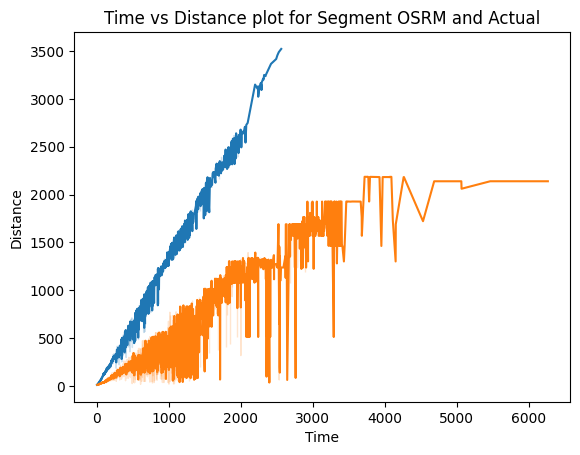

In [594]:
plt.title('Time vs Distance plot for Segment OSRM and Actual')
plt.xlabel("Time")
plt.ylabel("Distance")
sns.lineplot(trip_df, x="segment_osrm_time_sum", y="segment_osrm_distance_sum")
sns.lineplot(trip_df, x="actual_time", y="actual_distance_to_destination")
plt.show()

From the time vs distance plot above, we see that the actual (Orange) and OSRM (Blue) are varied by a significant margin.

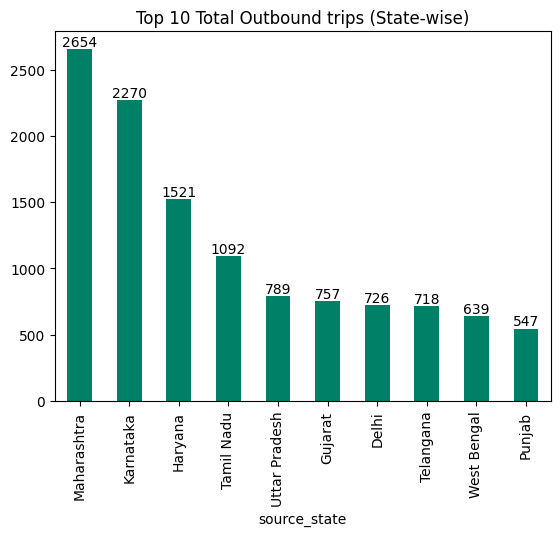

In [595]:
plt.title("Top 10 Total Outbound trips (State-wise)")
ax = trip_df.source_state.value_counts()[:10].plot(kind="bar", colormap="summer")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

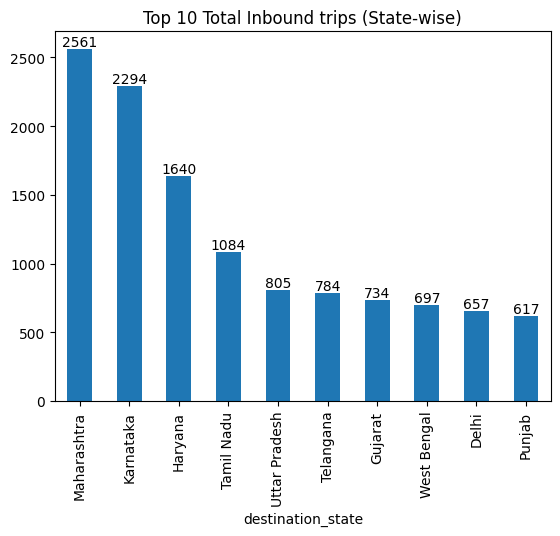

In [596]:
plt.title("Top 10 Total Inbound trips (State-wise)")
ax = trip_df.destination_state.value_counts()[:10].plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Analysis on Route Type

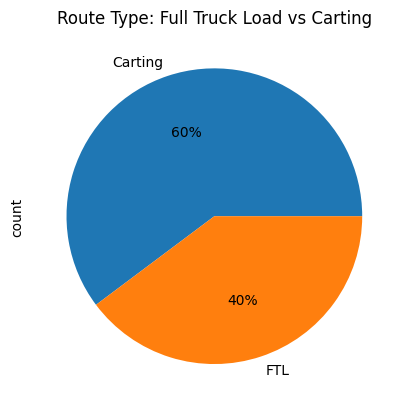

In [597]:
plt.title("Route Type: Full Truck Load vs Carting")
trip_df.route_type.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.show()

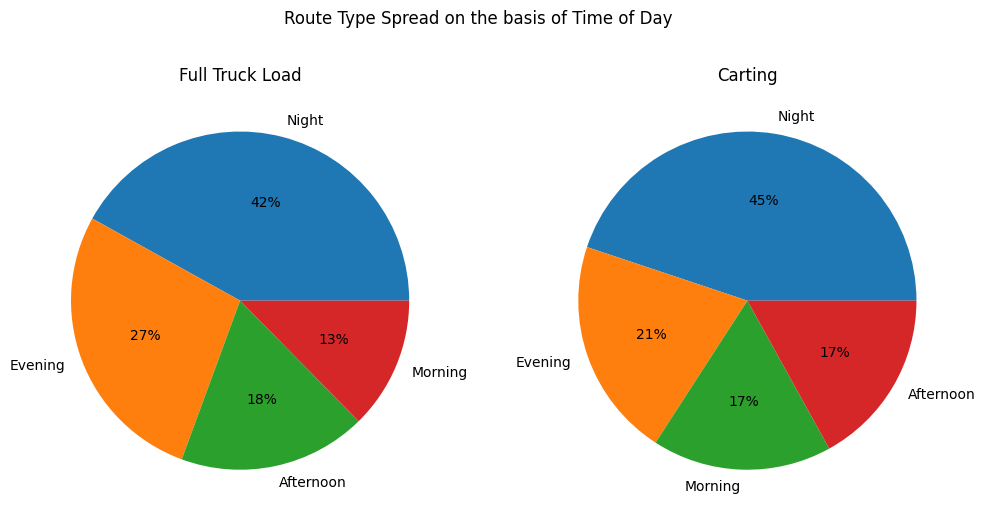

In [598]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Route Type Spread on the basis of Time of Day")
ax[0].title.set_text("Full Truck Load")
ax[0].pie(trip_df[trip_df.route_type == "FTL"].trip_creation_time_of_day.value_counts(
), labels=trip_df[trip_df.route_type == "FTL"].trip_creation_time_of_day.value_counts().index, autopct='%1.0f%%')
ax[1].title.set_text("Carting")
ax[1].pie(trip_df[trip_df.route_type == "Carting"].trip_creation_time_of_day.value_counts(
), labels=trip_df[trip_df.route_type == "Carting"].trip_creation_time_of_day.value_counts().index, autopct='%1.0f%%')
plt.show()

Performing Analysis on the Continous Variables for the Trip Data

<Axes: >

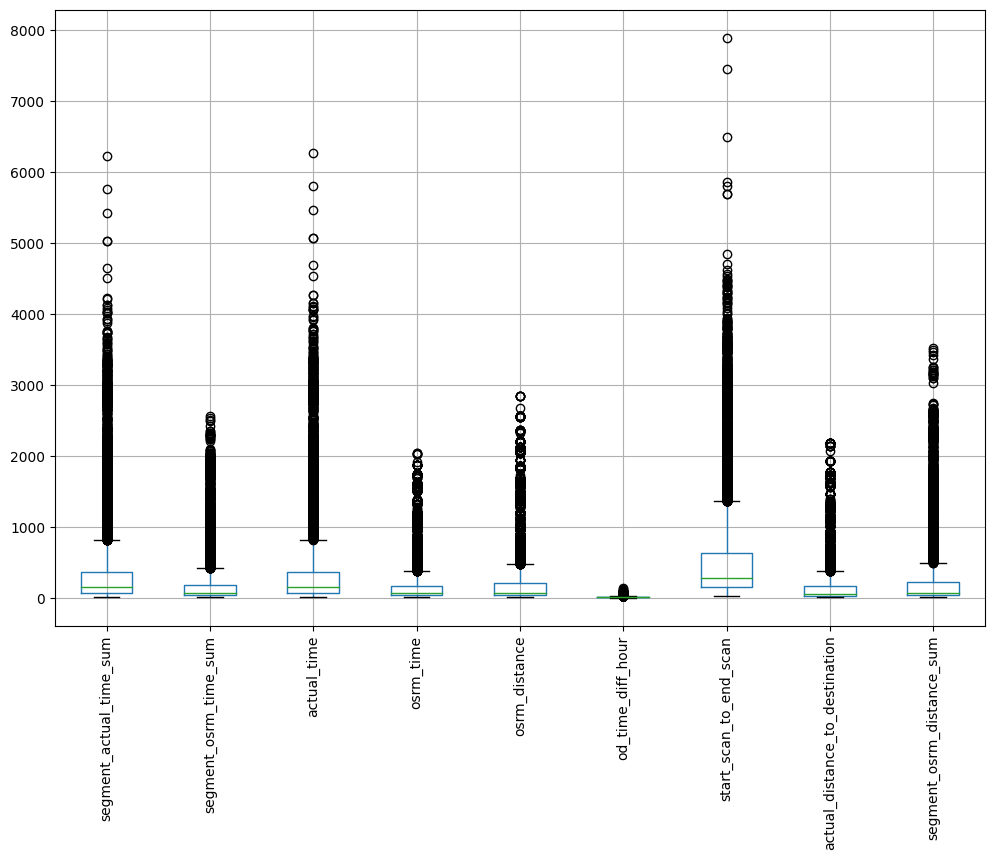

In [602]:
cont_vars = ["segment_actual_time_sum", "segment_osrm_time_sum", "actual_time", "osrm_time", "osrm_distance", "od_time_diff_hour", "start_scan_to_end_scan", "actual_distance_to_destination", "segment_osrm_distance_sum"]
trip_df[cont_vars].boxplot(rot=90, figsize=(12, 8))

In [611]:
# Handling the Outliers
Q1 = trip_df[cont_vars].quantile(0.25)
Q3 = trip_df[cont_vars].quantile(0.75)
IQR = Q3-Q1
trip_df = trip_df[~((trip_df[cont_vars] < (Q1-1.5*IQR)) |
        (trip_df[cont_vars] > (Q3+1.5*IQR))).any(axis=1)].reset_index(drop=True)
trip_df.head()

,trip_uuid,route_type,trip_creation_time,source_state,source_city,destination_state,destination_city,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_time_of_day,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour
0,trip-153671042288605164,Carting,2018-09-12 00:00:22.886430,Karnataka,Tumkur,Karnataka,Doddablpur,2018,9,Wednesday,Night,141.0,84.1894,65.0,180.0,73.186911,143.0,68.0,85.1110,3.026865
1,trip-153671046011330457,Carting,2018-09-12 00:01:00.113710,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,2018,9,Wednesday,Night,59.0,19.8766,16.0,100.0,17.175274,59.0,15.0,19.6800,1.674916
2,trip-153671052974046625,FTL,2018-09-12 00:02:09.740725,Karnataka,Hospet (Karnataka),Karnataka,Sandur,2018,9,Wednesday,Night,340.0,146.7919,115.0,717.0,127.448500,341.0,117.0,146.7918,11.972484
3,trip-153671055416136166,Carting,2018-09-12 00:02:34.161600,Tamil Nadu,Chennai,Tamil Nadu,Chennai,2018,9,Wednesday,Night,60.0,28.0647,23.0,189.0,24.597048,61.0,23.0,28.0647,3.174797
4,trip-153671066201138152,Carting,2018-09-12 00:04:22.011653,Tamil Nadu,Chennai,Tamil Nadu,Chennai,2018,9,Wednesday,Night,24.0,12.0184,13.0,98.0,9.100510,24.0,13.0,12.0184,1.633427
